# Numpy: Vectorized, matricial, and array manipulations
Array as the primary numpy structure for multi dimensional objects. It enables vectorazied, matricial, and tensor operations. Not so ever, it only allows a single atomical data type within it.

## Importing necessary libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Vectors and their manipulation
Vectors as unidimensional objects in python. Optimal structure that consumes less memory compared to basic data objects in python (lists, dictionaries, tuples, sets, etc).

**Exploring basic creation and operations**

In [3]:
#Vectors as flexible objects that allows multidimensional agrupation of data. Incorporates vectorized algebra to an array of elements.
#Vectorized operations
vector1 = np.array(range(1, 10)) #Transforming iterable to arrange
vector2 = np.array(range(21, 30)) #Transforming iterable to arrange

print((type(vector1), vector1), #Displaying data type
	  len(vector1), #Length,
      vector1.ndim, #Dimensions
	  vector1.shape, #Shape
	  sum(vector1), #Summation of its elements
	  vector1.prod(), #Product of the inner elements
	  vector1 * (2**4), #Enabled vectorized transformations
	  sep="\n")

print(vector1 + vector2) #Vector addition
print(vector1 - vector2) #Vector addition
print(vector1 * vector2) #Vector multiplication or cross product (No matricial multiplication)
print(np.dot(vector1, vector2)) #Dot product of the elements in both vectors. As both are 1D arrays it is equivalent to having a multiplication element by element and an overall aggregation.
print(np.dot(vector1, vector2) == sum(vector1 * vector2)) #Comprobation

#Deleting the temporary variables from the memory
del vector1, vector2

(<class 'numpy.ndarray'>, array([1, 2, 3, 4, 5, 6, 7, 8, 9]))
9
1
(9,)
45
362880
[ 16  32  48  64  80  96 112 128 144]
[22 24 26 28 30 32 34 36 38]
[-20 -20 -20 -20 -20 -20 -20 -20 -20]
[ 21  44  69  96 125 156 189 224 261]
1185
True


In [11]:
#Creating vectors from built-in functions
vector1 = np.array([0, 1, 2, 4, 5, 6]) #Transforming list into an array

np.random.seed(13) #Seed creation for guaranteeing reproducible results
print(
    vector1,
    np.empty(1), #Vector filled with whatever junk data happens to be present at that location in memory. (Fastest option for computers for creating placeholders)
    np.zeros(8), #Vector of zeros.
    np.ones(8), #Vector of ones.
    np.full((10,), 5), #Vector filled with a constant
    np.empty_like(vector1), #Creating vector of junk elements based on the dimensions of other objects. (Fastest option for computers for creating placeholders)
    np.zeros_like(vector1), #Creating vector of zeros based on the dimensions of other objects
    np.ones_like(vector1), #Creating vector of ones based on the dimensions of other objects
    np.full_like(vector1, 5), #Creating vector filled with a constant based on the dimensions of other objects
    np.random.random(5), #Vector of random numbers
    sep='\n'
)

del vector1

[0 1 2 4 5 6]
[2.5e-323]
[0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1.]
[5 5 5 5 5 5 5 5 5 5]
[1 1 1 1 1 1]
[0 0 0 0 0 0]
[1 1 1 1 1 1]
[5 5 5 5 5 5]
[0.77770241 0.23754122 0.82427853 0.9657492  0.97260111]


**Indexing and downcasting:**<br>
Numpy now enables us to use discontinuous indexing and replacement.

In [66]:
np.random.seed(12345)
vector1 = np.random.randint(0, 20, 10, dtype = 'int8') #Creating random array and constraining the data type for low memory usage.
print(vector1)

#Indexing and replacement
print(f'Showing discontinuous indexing: {vector1[list(range(0, 2)) + list(range(7, 10))]}',
      f'Showing continuous indexing and reversion: {vector1[1:5][::-1]}',
      f'Showing continuous indexing and reversion as a single step: {vector1[-2:5:-1]}',
      f'Showing continuous indexing and reversion as a single step: {vector1[-3:9]}',
      sep='\n'
)

vector1[[0, 2, 7, 9]] = np.zeros(4) #Substitution of 4 elements by 0
print(f'Showing discontinuous replacement: {vector1}')

#Downcasting -> Important for reducing memory consumption and accelerating the processing.
print(repr(vector1))
print(repr(vector1.astype("float16"))) #Taking into account that the maximum number is lower than 127

#Boolean masking for returning constant values
print(vector1[vector1 < 10])

#Boolean masking for removing null values
vector1 = vector1.astype("float16")
vector1[vector1 < 10] = np.nan
print(vector1[~np.isnan(vector1)])

del vector1

[ 2 17 13  5 13  1  3 16  1  8]
Showing discontinuous indexing: [ 2 17 16  1  8]
Showing continuous indexing and reversion: [13  5 13 17]
Showing continuous indexing and reversion as a single step: [ 1 16  3]
Showing continuous indexing and reversion as a single step: [16  1]
Showing discontinuous replacement: [ 0 17  0  5 13  1  3  0  1  0]
array([ 0, 17,  0,  5, 13,  1,  3,  0,  1,  0], dtype=int8)
array([ 0., 17.,  0.,  5., 13.,  1.,  3.,  0.,  1.,  0.], dtype=float16)
[0 0 5 1 3 0 1 0]
[17. 13.]


**Performing transformations in a vector level**

In [47]:
base_function = lambda x: (x**2) - (x**(1/3)) #Performing a customised function

vector1 = np.linspace(0, 90, 10, dtype="int16") #Creating a vector of 10 numbers equally spreaded between 0 and 90 inclusive
print(f'Original vector {vector1}',
      f'Vector modified by an scalar {vector1 + 1}', #Uses recycling or broadcasting of an atomical element
      f'Vector modified by an scalar {vector1 * 3}', #Uses recycling or broadcasting of an atomical element
      f'Vector after transformation via a customised function{np.vectorize(base_function)(vector1)}',
      sep= '\n'
)

Original vector [ 0 10 20 30 40 50 60 70 80 90]
Vector modified by an scalar [ 1 11 21 31 41 51 61 71 81 91]
Vector modified by an scalar [  0  30  60  90 120 150 180 210 240 270]
Vector after transformation via a customised function[   0.           97.84556531  397.28558238  896.89276749 1596.58004811
 2496.3159685  3596.08513236 4895.8787147  6395.69113062 8095.51859525]


### Matrices and their manipulation

**Fundamentals**

In [67]:
#Matrices creation
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])

print((matrix1, type(matrix1)), #Displaying data type
	  len(matrix1), #Number of rows
	  matrix1.shape, #Dimensions
	  sum(matrix1), #Summation of its elements by column
	  matrix1.sum(), #Summation of all of the elements within the matrix
	  matrix1.prod(), #Product of the inner elements
	  matrix1 * (2**4), #Enabled vectorized transformations
	  sep="\n")

#Basic operations between matrices
print(matrix1 + matrix2) #Matricial addition
print(matrix1 - matrix2) #Matricial substraction
print(matrix1 * matrix2) #Cross product between elements of a matrix (Different than matricial multiplication)
print(matrix1 ** 2) #Scalar transformation, in this case squaring the element
print(matrix1 @ matrix2) #Matricial multiplication. I smandatory the principle of axm mxn dimmensioning of the matrices.
print(np.linalg.inv(matrix1)) #Inverted matrix
print(np.transpose(matrix1)) #Transposing the elements
print(np.linalg.det(matrix1)) #Calculating the determinant

#Deleting the temporary variables from the memory
del matrix1, matrix2

(array([[1, 2],
       [3, 4]]), <class 'numpy.ndarray'>)
2
(2, 2)
[4 6]
10
24
[[16 32]
 [48 64]]
[[ 6  8]
 [10 12]]
[[-4 -4]
 [-4 -4]]
[[ 5 12]
 [21 32]]
[[ 1  4]
 [ 9 16]]
[[19 22]
 [43 50]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1 3]
 [2 4]]
-2.0000000000000004


In [78]:
#Creating matrices from built-in functions
#Creating a matrix from built-in functions
matrix1 = np.array([[0, 1, 2, 4, 5, 6], [7, 8, 9, 10, 11, 12]]) #Transforming list into an array

np.random.seed(13) #Seed creation for guaranteeing reproducible results
print(
    matrix1,
    np.empty([2, 6]), #Matrix filled with whatever junk data happens to be present at that location in memory. (Fastest option for computers for creating placeholders)
    np.zeros([2, 6]), #Matrix of zeros.
    np.ones([2, 6]), #Matrix of ones.
    np.eye(3, 3), #Identity matrix
    np.full((3, 3), 5), #Matrix filled with a constant
    np.empty_like(matrix1), #Creating a matrix of junk elements based on the dimensions of other objects. (Fastest option for computers for creating placeholders)
    np.zeros_like(matrix1), #Creating a matrix of zeros based on the dimensions of other objects
    np.ones_like(matrix1), #Creating a matrix of ones based on the dimensions of other objects
    np.full_like(matrix1, 5), #Creating a matrix filled with a constant based on the dimensions of other objects
    np.random.random([3, 3]), #Matrix of random numbers
    sep='\n'
)

del matrix1

[[ 0  1  2  4  5  6]
 [ 7  8  9 10 11 12]]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]
[[4607182418800017408 4607182418800017408 4607182418800017408
  4607182418800017408 4607182418800017408 4607182418800017408]
 [4607182418800017408 4607182418800017408 4607182418800017408
  4607182418800017408 4607182418800017408 4607182418800017408]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]]
[[0.77770241 0.23754122 0.82427853]
 [0.9657492  0.97260111 0.45344925]
 [0.60904246 0.77552651 0.64161334]]


**Indexing and reshaping**

In [141]:
np.random.seed(12345)
matrix1 = np.random.randint(0, 20, [3, 3], dtype = 'int8') #Creating random array and constraining the data type for low memory usage.
print(repr(matrix1))

#Indexing and replacement
print(f'Showing discontinuous indexing: \n{matrix1[[[0, 0], [2, 2]],
                                                   [[0, 2], [0, 2]]]}',
      f'Showing continuous indexing: \n{matrix1[0:2, 0:2]}',
      f'Showing continuous indexing and reversion: \n{matrix1[-1:0:-1, -1:0:-1]}',
      sep='\n'
)

matrix1[[[0, 0], [2, 2]],
        [[0, 2], [0, 2]]] = np.eye(2, 2) #Substitution of 4 elements by 0
print(f'Showing discontinuous replacement: \n{matrix1}')

del matrix1

array([[ 2, 17, 13],
       [ 5, 13,  1],
       [ 3, 16,  1]], dtype=int8)
Showing discontinuous indexing: 
[[ 2 13]
 [ 3  1]]
Showing continuous indexing: 
[[ 2 17]
 [ 5 13]]
Showing continuous indexing and reversion: 
[[ 1 16]
 [ 1 13]]
Showing discontinuous replacement: 
[[ 1 17  0]
 [ 5 13  1]
 [ 0 16  1]]
[1 0 5 1 0 1]
[17. 13. 16.]


In [177]:
##Boolean masking for returning specific rows/columns based of a criterion
np.random.seed(12345)
matrix1 = np.random.randint(0, 20, [4, 4], dtype = 'int8') #Creating random array and constraining the data type for low memory usage.
print(matrix1[matrix1[:,0] < 10])

#Reshaping vectors and matrices:
vector1 = np.arange(16)
print(vector1.reshape(4, 4))
print(vector1.reshape(2, 8))

del matrix1, vector1

[[ 2 17 13  5]
 [ 1  8  1  4]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]


**Example of its usage: Creating a bull's eye**

In [190]:
base = np.zeros([7, 7], dtype='int8')
base[1:-1, 1:-1] = 5
base[2:-2, 2:-2] = 0
base[3, 3] = 5
base

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 5, 5, 5, 5, 5, 0],
       [0, 5, 0, 0, 0, 5, 0],
       [0, 5, 0, 5, 0, 5, 0],
       [0, 5, 0, 0, 0, 5, 0],
       [0, 5, 5, 5, 5, 5, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int8)

## Miniproject:
Desinging a basic linear regression using matricial algebra. (This approach would be based on the simple linear regression rather than on the multiple approach for visualization purposes).

Intercept: [2.17034755] 
Parameter B1: [0.18244515]


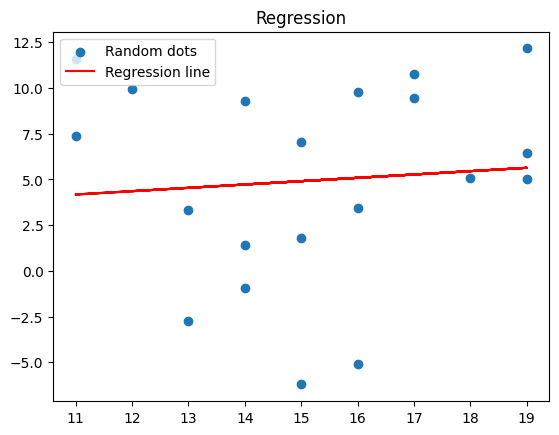

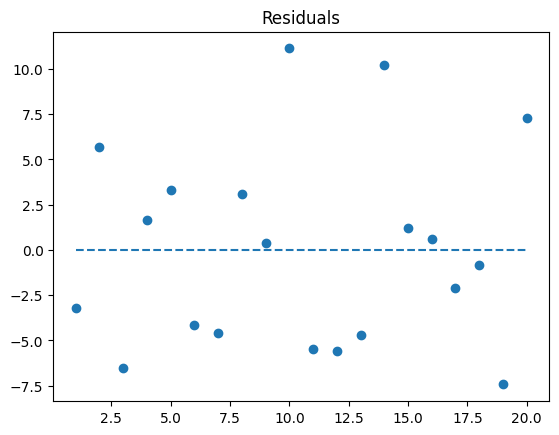

In [192]:
np.random.seed(1234)

#Calculating a linear regression via OLS by the algebraic representation
yvalues = np.transpose(np.array(np.random.normal(5, 5, 20), ndmin=2)) #Generating random numbers
xvalues = np.column_stack([np.random.binomial(30, 0.5, 20)]) #Generating random explanatory variables

#Restructuring X to add the constant term
xvalues_ols = np.column_stack([np.ones((xvalues.shape[0], 1)), xvalues])

#Calculating the coefficients via linear algebra
estimates = np.dot(np.linalg.inv(np.dot(np.transpose(xvalues_ols), xvalues_ols)), np.dot(np.transpose(xvalues_ols), yvalues))
yestim = np.dot(xvalues_ols, estimates)

print("Intercept: {} \nParameter B1: {}".format(estimates[0], estimates[1]))
#Plotting the random dots and the regression line
plt.title("Regression")
plt.scatter(xvalues, yvalues, label="Random dots")
plt.plot(xvalues, yestim, c="r", label="Regression line")
plt.legend(loc="upper left")
plt.show()

plt.title("Residuals")
plt.scatter(x=range(1, len(yvalues)+1), y=(yestim - yvalues))
plt.plot(range(1, len(yvalues)+1), np.array([0]* (len(yvalues))), "--")
plt.show()

#Deleting the temporary variables from the memory
del xvalues, xvalues_ols, yvalues, yestim, estimates